In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hrt = pd.read_csv('heart.csv')
hrt.head(6)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,NaN,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [16]:
# Check all the rows and columns
hrt.shape

(918, 12)

In [7]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             914 non-null    float64
 1   Sex             914 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [9]:
hrt.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,914.000000,914,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,723,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.539387,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.426553,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [3]:
hrt.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,914.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.539387,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.426553,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##### Data Cleaning

In [11]:
# Checking all the null values
hrt.isna().sum()

Age               4
Sex               4
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
# Removing null values from age column
age_avg = np.mean(hrt['Age'])
hrt['Age'].fillna(age_avg, inplace = True)

In [16]:
# Removing null values from Sex column
sex_counts = hrt['Sex'].value_counts()
sex_counts
hrt['Sex'].fillna('M',inplace = True)

### EDA

In [4]:
cp = hrt['ChestPainType'].value_counts()
cp

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

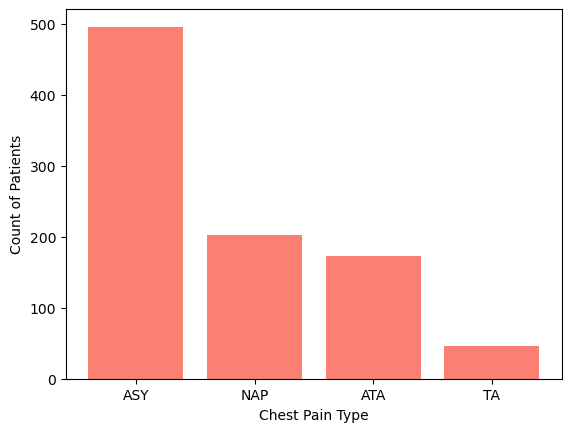

In [7]:
# Bar graph of Chest pain types of patients
plt.bar(cp.index , cp.values, color = 'salmon')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count of Patients')
plt.show()

#### Above graph shows that maximum patients suffer from ASY type of chest pain and minimum are recoreded with TA type of chest pain

In [8]:
heartdist = hrt['HeartDisease'].value_counts()
heartdist

HeartDisease
1    508
0    410
Name: count, dtype: int64

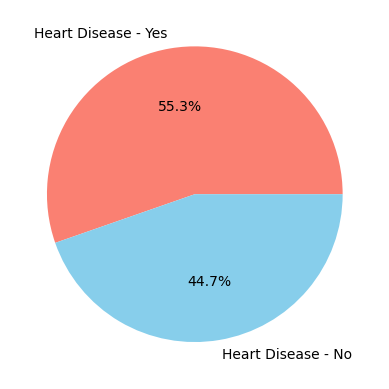

In [9]:
# Ratio of number of patients suffer from heart disease
plt.pie(heartdist.values, labels=['Heart Disease - Yes','Heart Disease - No'], autopct='%0.1f%%', colors=['salmon','skyblue'])
plt.show()

#### Above pie chart represents that the half of the patients suffer from heart disease

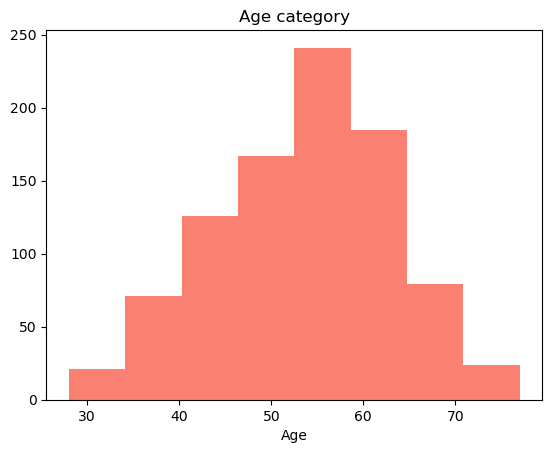

In [10]:
# Age categories suffering from heart
plt.hist(hrt['Age'],bins = 8,color='salmon')
plt.title('Age category')
plt.xlabel('Age')
plt.show()

#### Above graph represents that age group from 45 years to 65 years old are heart patients 

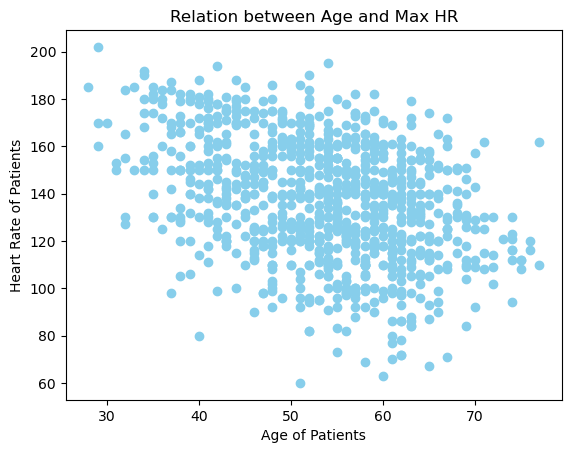

In [12]:
# Scatter plot relation between Age and Max heart rate
plt.scatter(hrt['Age'],hrt['MaxHR'],color = 'skyblue')
plt.title('Relation between Age and Max HR')
plt.xlabel('Age of Patients')
plt.ylabel('Heart Rate of Patients')
plt.show()

#### Above plot shows that, as the age increase, the heart rate of patients descreases

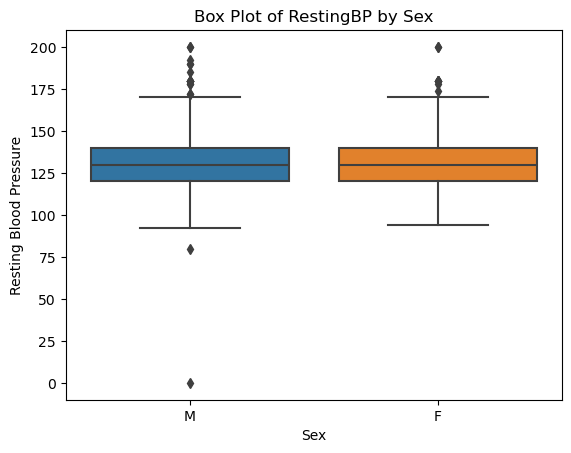

In [14]:
# Box plot of RestingBP by Sex
sns.boxplot(x = 'Sex',y = 'RestingBP', data = hrt)
plt.title('Box Plot of RestingBP by Sex')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure')
plt.show()

#### Above plot represents the gender differences in resting blood pressure which is almost equal except for some conditions, also know as outliers